In [86]:
import matplotlib.pyplot as plt

In [87]:
import networkx as nx

In [88]:
import json
import numpy as np
import pandas as pd

In [89]:
from collections import defaultdict


class Grafo(object):
    """ Implementação básica de um grafo. """

    def __init__(self, arestas, direcionado=False):
        """Inicializa as estruturas base do grafo."""
        self.adj = defaultdict(set)
        self.direcionado = direcionado
        self.adiciona_arestas(arestas)


    def get_vertices(self):
        """ Retorna a lista de vértices do grafo. """
        return list(self.adj.keys())


    def get_arestas(self):
        """ Retorna a lista de arestas do grafo. """
        return [(k, v) for k in self.adj.keys() for v in self.adj[k]]


    def adiciona_arestas(self, arestas):
        """ Adiciona arestas ao grafo. """
        for u, v in arestas:
            self.adiciona_arco(u, v)


    def adiciona_arco(self, u, v):
        """ Adiciona uma ligação (arco) entre os nodos 'u' e 'v'. """
        self.adj[u].add(v)
        # Se o grafo é não-direcionado, precisamos adicionar arcos nos dois sentidos.
        if not self.direcionado:
            self.adj[v].add(u)


    def existe_aresta(self, u, v):
        """ Existe uma aresta entre os vértices 'u' e 'v'? """
        return u in self.adj and v in self.adj[u]


    def __len__(self):
        return len(self.adj)


    def __str__(self):
        return '{}({})'.format(self.__class__.__name__, dict(self.adj))


    def __getitem__(self, v):
        return self.adj[v]


In [90]:
apache = open('apache_cc.json').read()
classesApache = json.loads(apache)

In [91]:
xStream = open('x_stream_analysis.json').read()
classesXStream = json.loads(xStream)

In [92]:
df = pd.DataFrame(classesApache)

In [93]:
df.head()

,LinkedSubList,HashIterator,SplitMapUtils,FlatMapIterator,ComparableComparator,AbstractPropertiesFactory,AbstractMapBag,ReferenceMapIterator,RangeMap,PushbackIterator,...,FluentIterable,UnmodifiableIterator,Flat3Map,UnmodifiableIterable,ArrayUtils,SingletonMapIterator,InsertCommand,NullIsExceptionPredicate,FalsePredicate,TransformedSortedMap
loc,126,73,232,101,85,133,579,36,160,73,...,436,54,1208,11,93,79,22,61,41,120
nopa,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
inheritance_path,LinkedSubList.AbstractList,,,,,,,ReferenceMapIterator,RangeMap,,...,,,,UnmodifiableIterable,,,InsertCommand,,,TransformedSortedMap.TransformedMap.AbstractIn...
fanout,4,2,2,2,3,8,9,1,4,2,...,14,1,7,0,4,2,1,2,2,3
methods,63,16,14,20,30,21,39,23,66,18,...,45,17,54,45,15,22,14,15,15,69


In [94]:
keys = df.columns

In [95]:
arestas = []

In [96]:
for i in keys:
    
    l = df[i]['inheritance_path']
    try:
        l = l.split('.')
        for j in l:
            arestas.append((i,j))
    except:
        if l!='':
            arestas.append((i,df[i]['inheritance_path']))
    

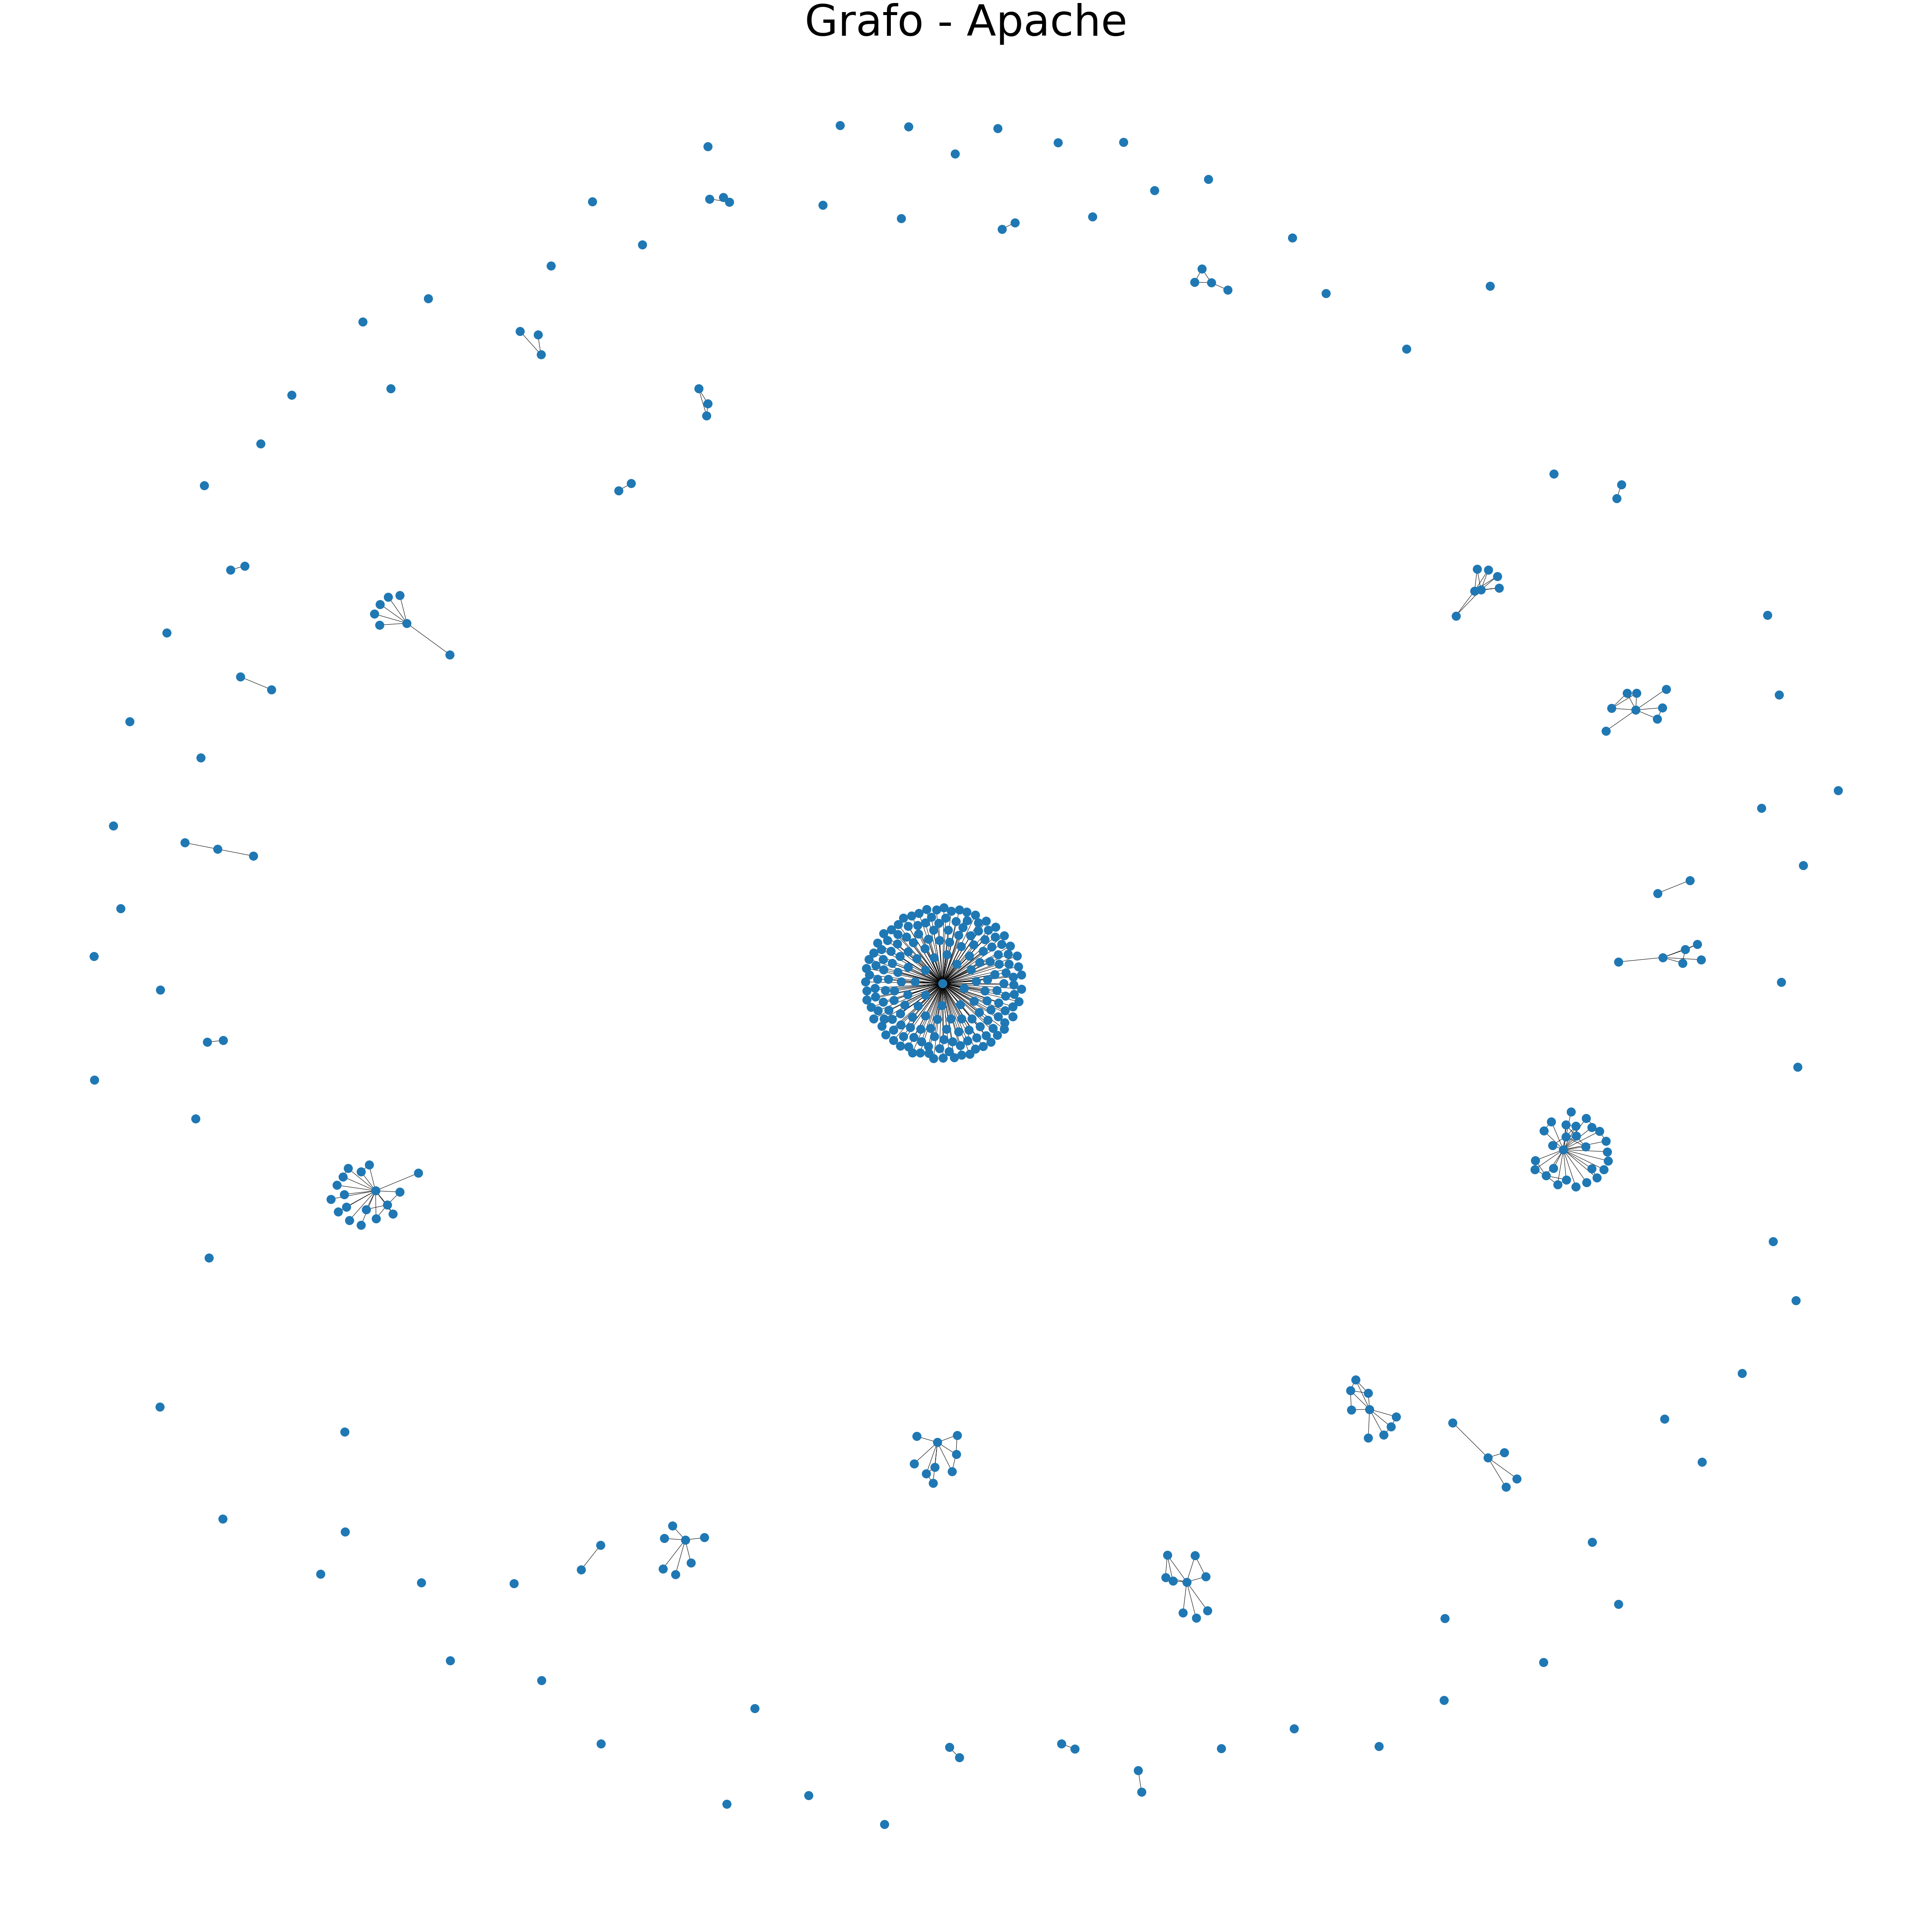

In [97]:
plt.figure(1, figsize=(80, 80))             #definindo o tamanho da figura
pos=nx.fruchterman_reingold_layout(G)      #definindo o algoritmo do layout
plt.axis('off')                            #retira as bordas
nx.draw_networkx_nodes(G,pos,node_size=400) #plota os nodes
nx.draw_networkx_edges(G,pos,alpha=1)    #plota os ties
plt.title('Grafo - Apache', size=100)     #Título
plt.show()  

## XStream

In [98]:
df2 = pd.DataFrame(classesXStream)

In [99]:
keys2 = df2.columns

In [100]:
arestas2 = []

In [101]:
for i in keys2:
    
    l = df2[i]['inheritance_path']
    try:
        l = l.split('.')
        for j in l:
            arestas2.append((i,j))
    except:
        if l!='':
            arestas2.append((i,df2[i]['inheritance_path']))

In [102]:
grafo2 = Grafo(arestas2, direcionado=True)

In [103]:
G2 = nx.Graph(arestas2)

In [104]:
pos=nx.fruchterman_reingold_layout(G2)

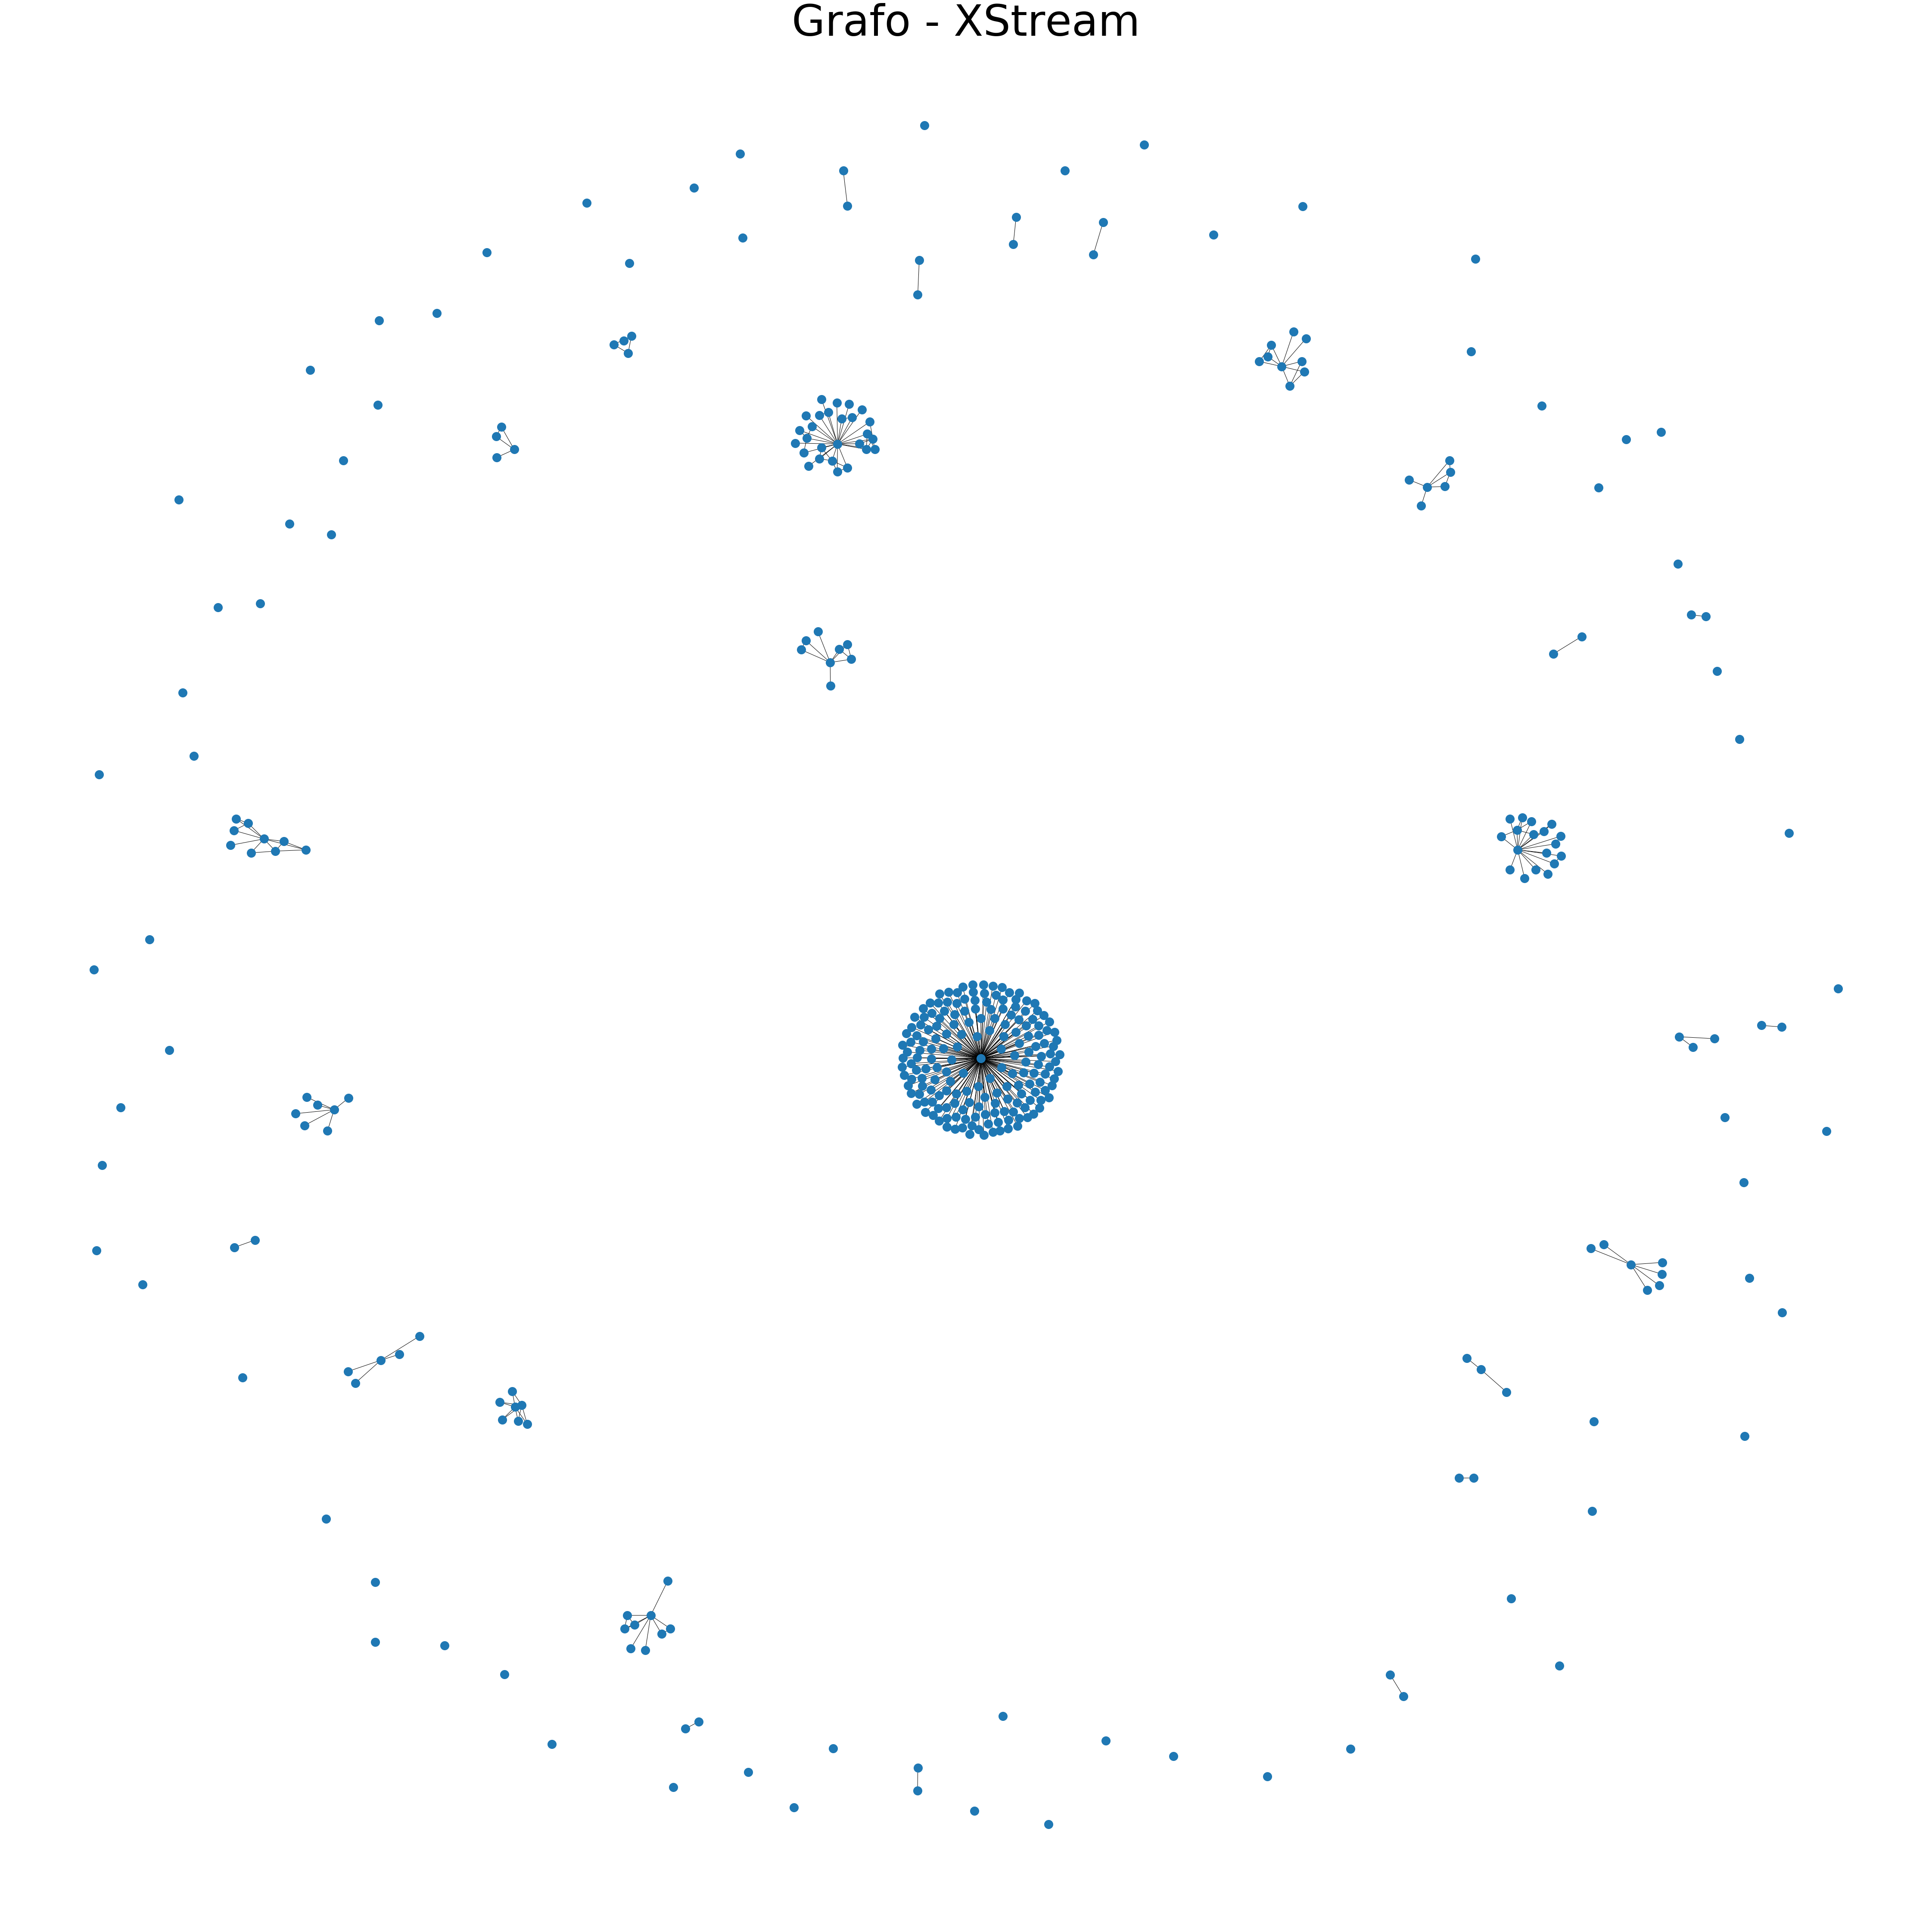

In [105]:
plt.figure(1, figsize=(80, 80))             #definindo o tamanho da figura
pos=nx.fruchterman_reingold_layout(G)      #definindo o algoritmo do layout
plt.axis('off')                            #retira as bordas
nx.draw_networkx_nodes(G,pos,node_size=400) #plota os nodes
nx.draw_networkx_edges(G,pos,alpha=1)    #plota os ties
plt.title('Grafo - XStream', size=100)     #Título
plt.show()  